# Initial Investigation of the Dataset
---
## Summary

### This notebook aims to answer:
- What NaN values need addressed?
- How balanced is the Dataset?

### SETUP CELL
- Import the libraries that are going to be used
- Read in the dataset
- Validate that the dataset has been read in correctly

In [1]:
#SETUP CELL
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob

#working dirr
path = 'E:/Workspace/Dataset/'
os.chdir(path)

#get filenames of the dataset
allFilenames = [i for i in glob.glob('*.{}'.format('csv'))]

#read the dataset into a panda dataframe
df = pd.concat([pd.read_csv(f) for f in allFilenames])

#check the dataset has read in correctly
df.head()

C:\Users\grego\AppData\Local\Temp\ipykernel_9588\4167609046.py:17: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in allFilenames])
C:\Users\grego\AppData\Local\Temp\ipykernel_9588\4167609046.py:17: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in allFilenames])
C:\Users\grego\AppData\Local\Temp\ipykernel_9588\4167609046.py:17: DtypeWarning: Columns (0,1,3,4,5,6,7,8,

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN


#### Observations 1
Flow ID, Src IP, Src Port, and Dst IP appear to be NaN. This is done to mitigate classifiers being biased to specific machines and not the actual patterns of malicious traffic.

### Investigate NaN
As observed, there are missing values in Flow ID, Src IP, Scr Port, and Dst IP. This needs further investigation to determine if this is the case for all entries, or just a select few.

This will be achieved by:
- Getting the number of entried in the dataset
- Getting the number of missing values in the dataset

In [2]:
#General info on the dataset
df.info()

#number of missing data points per collumn
missingCount = df.isnull().sum()

#output
missingCount[0:84]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233002 entries, 0 to 613103
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           object 
 1   Protocol           object 
 2   Timestamp          object 
 3   Flow Duration      object 
 4   Tot Fwd Pkts       object 
 5   Tot Bwd Pkts       object 
 6   TotLen Fwd Pkts    object 
 7   TotLen Bwd Pkts    object 
 8   Fwd Pkt Len Max    object 
 9   Fwd Pkt Len Min    object 
 10  Fwd Pkt Len Mean   object 
 11  Fwd Pkt Len Std    object 
 12  Bwd Pkt Len Max    object 
 13  Bwd Pkt Len Min    object 
 14  Bwd Pkt Len Mean   object 
 15  Bwd Pkt Len Std    object 
 16  Flow Byts/s        object 
 17  Flow Pkts/s        object 
 18  Flow IAT Mean      object 
 19  Flow IAT Std       object 
 20  Flow IAT Max       object 
 21  Flow IAT Min       object 
 22  Fwd IAT Tot        object 
 23  Fwd IAT Mean       object 
 24  Fwd IAT Std        object 
 25  Fwd IAT Max       

Dst Port               0
Protocol               0
Timestamp              0
Flow Duration          0
Tot Fwd Pkts           0
                  ...   
Label                  0
Flow ID          8284254
Src IP           8284254
Src Port         8284254
Dst IP           8284254
Length: 84, dtype: int64

#### Observations 2
Around half of the entries have missing values in Flow ID, Src IP, Src Port, and Dst IP.
The two options are to drop every entry with a missing occurence, or to drop the specified columns.

The solution is to drop the columns rather than halving the size of the dataset, and as discussed in [Observations 1](#observations-1), these variables would create a classifier that is biased to specific machines.

### Dropping NaN
- Drop the specified columns
- Double check for missing values

In [3]:
#drop src ip, dst ip, src port, flow id
df = df.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1)

#number of missing data points per collumn
missingCountDropped = df.isnull().sum()

#Double check the percentage of missing data after drop
totalCells = np.product(df.shape)
totalMissing = missingCountDropped.sum()

percentMissing = (totalMissing/totalCells)*100
print(percentMissing)

0.004598733493656935


#### Observations 3
The percentage of missing data is now negligible, so it is fine to just drop the entries with missing values.

In [4]:
#Drop entries with missing values
df = df.dropna()

### Investigating the Class Balance
This section aims to:
- Get the number of occurences of each class
- Visualise the results

In [5]:
#Get class distribution
print(df['Label'].value_counts())

Benign                      13425831
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193354
SSH-Bruteforce                187589
Infilteration                 161096
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Label                             59
Name: Label, dtype: int64


#### Observations 4
There appears to be occurences of the label 'Label', this is believed to be a mistake so entries with the lable 'Label' will be dropped.

Benign traffic is the most predominant class unsuprisingly, it should be noted that SQL Injection, XSS, and Web are very underrepresented, this will result in poor classification of the underrepresented classes, this most likely wouldn't show in the overall accuracy of the model. The imbalance needs to be addressed.

<AxesSubplot:xlabel='count', ylabel='Label'>

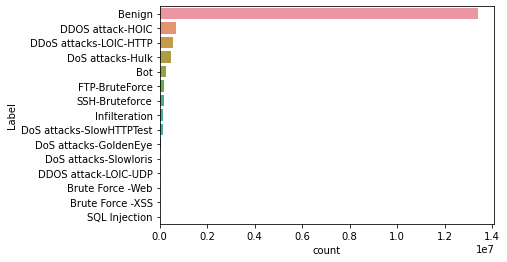

In [6]:
#Remove the instances with the lablel 'Label'
df = df[df.Label != 'Label']

#plot and visualise the class distribution
sns.countplot(y='Label', data=df, order = df['Label'].value_counts().index)

### Export the CSV
The dataset has been processed and can now be saved, this is what will be used for training the classifier models.

In [7]:
#Export to csv now that it is cleaned
df.to_csv('E:/Workspace/Dataset/combined.csv', index = False)

### Future Work
The next step is to address the class imbalances, there are a few methods that can be implemented, Synthetic Minority Oversampling Technique (SMOTE), Undersampling, calculating the class weight. Each of these methods will be implemented and the performance metrics will be compared.